<a href="https://colab.research.google.com/github/TarekMohamdELdeldokla/AiPlatforms-2305530-Task2-Fashion-MNIST-Data/blob/main/2305530_AiPlatforms2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
# LoadDataFromMinst
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [13]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = FashionNN()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
epochs = 10
train_losses, test_accuracies = [], []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

In [18]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

In [20]:
acc = 100 * correct / total
test_accuracies.append(acc)
print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f} - Test Accuracy: {acc:.2f}%")

Epoch [10/10] - Loss: 0.2197 - Test Accuracy: 87.34%


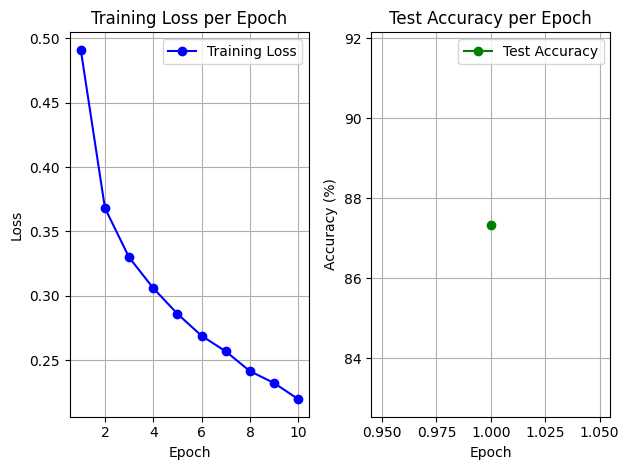

In [24]:

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Training Loss'])



plt.subplot(1, 2, 2)
plt.plot(range(1, len(test_accuracies)+1), test_accuracies, marker='o', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend(['Test Accuracy'])

plt.tight_layout()
plt.show()

In [25]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

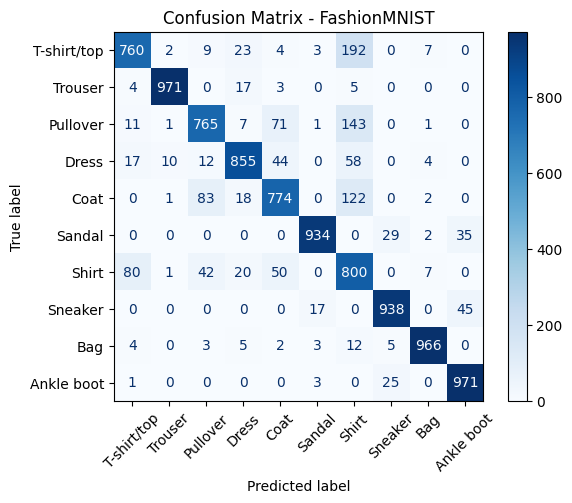

In [26]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix - FashionMNIST")
plt.show()

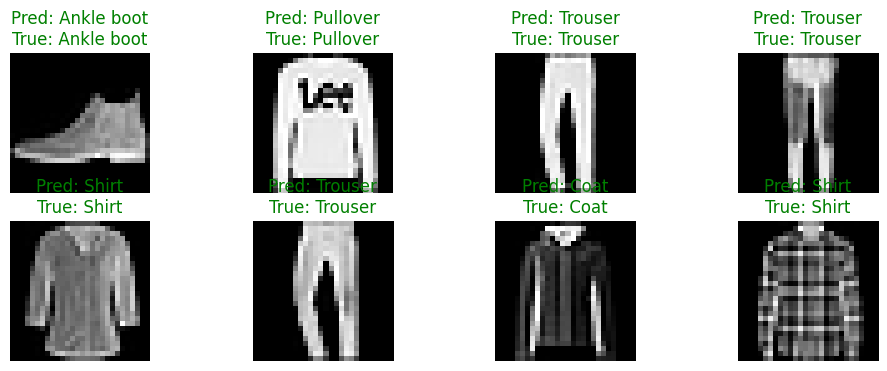

In [27]:
def show_examples(model, loader, n=8):
    model.eval()
    data_iter = iter(loader)
    images, labels = next(data_iter)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        color = "green" if preds[i] == labels[i] else "red"
        plt.title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}", color=color)
        plt.axis('off')
    plt.show()
show_examples(model, test_loader)

In [28]:
print("\nConclusion:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")
print("The model achieved over 85% accuracy on the FashionMNIST test set using a simple fully connected NN.")


Conclusion:
Final Test Accuracy: 87.34%
The model achieved over 85% accuracy on the FashionMNIST test set using a simple fully connected NN.
